## Get my favorite songs from my Spotify playlists 

1) Load libaries 

In [65]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

2) Getting API connection and test it

In [3]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='here is my secret client id',
                                                           client_secret='here is my secret client key'))

results = sp.search(q='artist: Forest Blakk', limit=2)
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=artist%3A+Forest+Blakk&type=track&offset=0&limit=2',
  'items': [{'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7q7IUe2AqtifSZ2q52kHFc'},
       'href': 'https://api.spotify.com/v1/artists/7q7IUe2AqtifSZ2q52kHFc',
       'id': '7q7IUe2AqtifSZ2q52kHFc',
       'name': 'Forest Blakk',
       'type': 'artist',
       'uri': 'spotify:artist:7q7IUe2AqtifSZ2q52kHFc'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ',
      'DE',
      'DJ',
    

3) Function to get the necessary informations from my top playlistes with the id of the Spotify playlist

In [29]:
def playlist_songs(playlist_id):
    results = sp.playlist(playlist_id)
    ids=[]

    for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
    song_meta={'id':[],'album':[], 'name':[],'artist':[],'explicit':[],'popularity':[]}

    for song_id in ids:
        meta = sp.track(song_id)
        song_meta['id'].append(song_id)

        album=meta['album']['name']
        song_meta['album']+=[album]

        song=meta['name']
        song_meta['name']+=[song]
    
        s = ', '
        artist=s.join([singer_name['name'] for singer_name in meta['artists']])
        song_meta['artist']+=[artist]
    
        explicit=meta['explicit']
        song_meta['explicit'].append(explicit)
    
        popularity=meta['popularity']
        song_meta['popularity'].append(popularity)

    song_meta_df=pd.DataFrame.from_dict(song_meta)

    features = sp.audio_features(song_meta['id'])
    features_df=pd.DataFrame.from_dict(features)

    # convert milliseconds to mins
    features_df['duration_ms']=features_df['duration_ms']/60000
    
    playlist=song_meta_df.merge(features_df)
    
    return playlist

In [30]:
playlist_1 = playlist_songs('3UERdXjRtUA8vNRQTtnY8M')

In [31]:
playlist_1.head()

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,7E7D6Db8wfIEeNryNiDXtr,Somethinggreater,Somethinggreater - Single Version,Parcels,False,61,0.693,0.572,1,-10.491,...,0.000405,0.0736,0.867,109.816,audio_features,spotify:track:7E7D6Db8wfIEeNryNiDXtr,https://api.spotify.com/v1/tracks/7E7D6Db8wfIE...,https://api.spotify.com/v1/audio-analysis/7E7D...,3.484983,4
1,3u7bbColqgRndsd6RTeIim,Conchiglie,Conchiglie,Andrea Laszlo De Simone,False,44,0.459,0.500,3,-11.337,...,0.908000,0.3560,0.276,149.861,audio_features,spotify:track:3u7bbColqgRndsd6RTeIim,https://api.spotify.com/v1/tracks/3u7bbColqgRn...,https://api.spotify.com/v1/audio-analysis/3u7b...,7.230700,4
2,08edmNLQhAqaKkNeiRgBQM,Other Here Comes The Cowboy Demos,Out Of My Head,Mac DeMarco,False,47,0.811,0.553,3,-9.257,...,0.159000,0.2020,0.765,100.547,audio_features,spotify:track:08edmNLQhAqaKkNeiRgBQM,https://api.spotify.com/v1/tracks/08edmNLQhAqa...,https://api.spotify.com/v1/audio-analysis/08ed...,4.366933,4
3,50wiHcvfcpQSo5P5rbyozc,In Mind,Saturday,Real Estate,False,46,0.525,0.717,0,-6.060,...,0.575000,0.1210,0.211,130.898,audio_features,spotify:track:50wiHcvfcpQSo5P5rbyozc,https://api.spotify.com/v1/tracks/50wiHcvfcpQS...,https://api.spotify.com/v1/audio-analysis/50wi...,4.717117,4
4,5l1AMUJEA43GYqxpfTyhoT,Winter Wheat,Postdoc Blues,John K. Samson,False,32,0.665,0.797,10,-9.172,...,0.017300,0.0958,0.717,143.176,audio_features,spotify:track:5l1AMUJEA43GYqxpfTyhoT,https://api.spotify.com/v1/tracks/5l1AMUJEA43G...,https://api.spotify.com/v1/audio-analysis/5l1A...,3.384850,4


In [36]:
playlist_2 = playlist_songs('7yd0uFcl7Goe6QctOUSunM')
playlist_2.shape

(53, 23)

In [35]:
playlist_3 = playlist_songs('4uGpGn66fyq3Ecc5VNo4Kv')
playlist_3.shape

(18, 23)

In [37]:
playlist_4 = playlist_songs('7wafY5f6WVMCodSxn1tvXB')
playlist_4.shape

(62, 23)

4) Concat the four playlists

In [67]:
playlists = [playlist_1, playlist_2, playlist_3, playlist_4]
top_spotify_songs = pd.concat(playlists)
top_spotify_songs.to_csv('top_spotify_songs.csv', index=False)
top_spotify_songs.shape

(158, 23)

5) Extract the features

In [68]:
top_spotify_features = top_spotify_songs[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]
top_spotify_features.to_csv('top_spotify_features.csv', index=False)

In [69]:
top_spotify_features.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.617424,0.546827,-9.564304,0.048139,0.390780,0.206342,0.156380,0.547291,117.475544,4.140921
std,0.138345,0.198490,3.305743,0.033630,0.319545,0.293076,0.125181,0.245672,25.646233,1.331527
min,0.263000,0.034100,-19.484000,0.025000,0.000331,0.000000,0.029500,0.067100,58.574000,2.142517
25%,0.532500,0.424500,-11.523500,0.032525,0.073750,0.000148,0.096825,0.345750,100.657000,3.266500
50%,0.630500,0.563000,-9.103000,0.037600,0.320000,0.018450,0.111000,0.584000,114.997000,3.742650
75%,0.711000,0.684750,-7.347000,0.048600,0.697500,0.370250,0.158500,0.754500,129.771250,4.624383
max,0.902000,0.971000,-2.769000,0.281000,0.986000,0.960000,0.812000,0.967000,204.429000,8.638650


6) Scale the features

In [66]:
min_max_scaler = MinMaxScaler()
top_spotify_feature_scaled = top_spotify_features.loc[:]=min_max_scaler.fit_transform(top_spotify_features.loc[:])

In [70]:
top_spotify_features_scaled = pd.DataFrame.from_dict(top_spotify_feature_scaled)
top_spotify_features_scaled.to_csv('top_spotify_features_scaled.csv', index=False)
top_spotify_features_scaled.shape

(158, 10)

### Visualization distribution of audio features - top spotify songs 

In [61]:
def plot_features(music_feature_scaled):
    fig=plt.figure(figsize=(12,8))
    categories=list(music_feature_scaled.columns)
    N=len(categories)
    value=list(music_feature_scaled.mean())
    value+=value[:1]
    angles=[n/float(N)*2*3.14159265359 for n in range(N)]
    angles+=angles[:1]
    plt.polar(angles, value)
    plt.fill(angles,value,alpha=0.3)
    plt.title('Top Songs Audio Features', size=20)
    plt.xticks(angles[:-1],categories, size=15)
    plt.yticks(color='grey',size=15)
    plt.show()

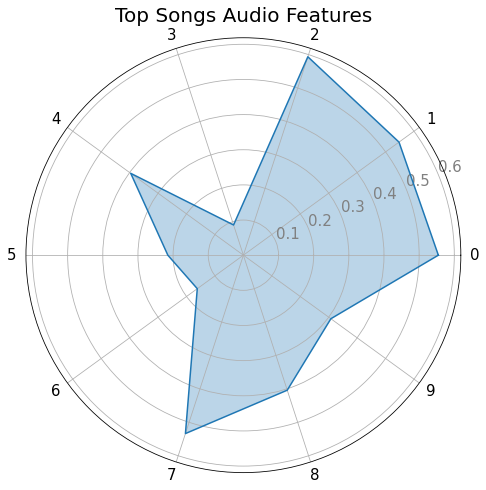

In [62]:
plot_features(top_spotify_features_scaled)